# Imports

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import time
import pickle
import math
from collections import deque
from pingpong import pingpongRL
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pygame 2.0.1 (SDL 2.0.14, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [8]:
alpha=0.01
alpha_decay=0.01
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(24, input_dim=5, activation='tanh')) # input the 5 dimensions of the state
model.add(tf.keras.layers.Dense(48, activation='tanh'))
model.add(tf.keras.layers.Dense(2, activation='linear')) # output the Q-values (value function) for the two actions

optimizer=keras.optimizers.Adam(learning_rate=alpha, decay=alpha_decay)
loss = keras.losses.MeanSquaredError()
model.compile(optimizer=optimizer, loss=loss)

In [9]:
state = np.array([[1,1,1,1,0]])

In [7]:
PATH = "RL/agents/"
time_stamp = 1603
mem = list(pickle.load(open(f"{PATH}mem{210624}_{time_stamp}.p", "rb")))
loss = list(pickle.load(open(f"{PATH}loss{210624}_{time_stamp}.p", "rb")))
score = list(pickle.load(open(f"{PATH}scores{210624}_{time_stamp}.p", "rb")))

In [8]:
episodes = np.linspace(0,len(loss)-1, len(loss))

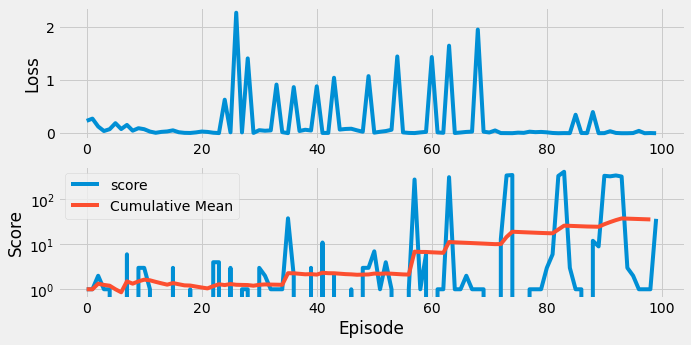

In [9]:
fig, axs = plt.subplots(2,1, figsize=(10, 5))
ax = axs[0]
ax.plot(episodes, loss)
ax.set(ylabel = 'Loss')
ax = axs[1]
ax.plot(episodes, score, label='score')
ax.plot(episodes[:-1], [np.mean(score[0:t]) for t in range(1, len(score))], label='Cumulative Mean')
ax.set(ylabel='Score', xlabel='Episode', yscale='log')
ax.legend()

In [77]:
def step_decay(t):
    return epsilon * epsilon_step_decay ** t

def episode_decay(t):
    return epsilon*epsilon_episode_decay**t

In [101]:
epsilon_min = 0.01
epsilon = 1.0
epsilon_step_decay = 0.995
epsilon_episode_decay = 0.97
steps = np.linspace(0,10*2*60-1,10*2*60)
episodes = np.linspace(0,99,100)

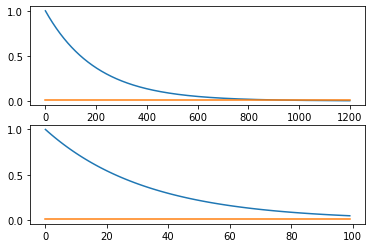

In [102]:
fig, axs = plt.subplots(2,1)
ax=axs[0]
ax.plot(steps, step_decay(steps))
ax.plot([steps[0], steps[-1]], [epsilon_min, epsilon_min])
ax=axs[1]
ax.plot(episodes, episode_decay(episodes))
ax.plot([episodes[0], episodes[-1]], [epsilon_min, epsilon_min])

In [71]:
max(1,2)

2